# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Importing necessary Libraries
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm


## 1.1.0 Reading Data

In [3]:
# Reading Data
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')



In [4]:
# Merging two dataframes 

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [4]:
# Data Overview

print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [6]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [7]:
# mergring project title and essay text 
project_data["essay_title_concatenated"] = project_data["essay"].map(str) +\
                        project_data['project_title'].map(str) 

In [8]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'essay', 'essay_title_concatenated'],
      dtype='object')

In [9]:
cols_drop=[ 'project_essay_1','project_essay_2', 'project_essay_3', 'project_essay_4', 'essay','project_title']
project_data=project_data.drop(cols_drop,axis=1)

In [10]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [11]:
project_data.essay_title_concatenated[89]

"My students come mostly from the Middle East and most haven't even been to school due to war or financial issues.  My students come from limited schooling in their own language and are thrust into formal school settings with structure and rules. \\r\\nThey come to school eager and excited to learn.   My students are willing and want to start their educational journey.  I want, along with the community, to help these students to strive to the best of their capabilities.The use of the supplies will be used on a daily basis.  Students will be able to listen to books, learn their alphabets, work on phonics, work on writing and math.  \\r\\nStudents who are new to this country will benefit the most because they will be able to go on educational websites that will help in their educational journey.  They are eager to learn that they will do anything to learn.  With the use of technology they will be able to expediate their learning. Also, the addition of technology would give my students a 

## 1.1.1 Spliting Data

In [12]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_resource_summary,teacher_number_of_previously_posted_projects,essay_title_concatenated
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",My students need STEM kits to learn critical s...,53,I have been fortunate enough to use the Fairy ...


In [13]:

x=project_data

In [14]:
#  Spliting data into Train , Cross Validation and Test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,stratify=y)
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.33,stratify=y_train)

In [15]:
print(x_train.shape, y_train.shape)
print(x_cv.shape, y_cv.shape)
print(x_test.shape, y_test.shape)



(49041, 12) (49041,)
(24155, 12) (24155,)
(36052, 12) (36052,)


In [16]:
#Columns in Trainning Data
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'essay_title_concatenated'],
      dtype='object')

## 1.2 preprocessing of `project_subject_categories`

In [17]:
# Function to Pre Process project subject Categories

def clean_categories(df,col='project_subject_categories'):
    catogories = list(df[col].values)
    cat_list = []
    for i in catogories:
        temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        cat_list.append(temp.strip())
    
    df['clean_categories'] = cat_list
    df.drop([col], axis=1, inplace=True)

    from collections import Counter
    my_counter = Counter()
    for word in df['clean_categories'].values:
        my_counter.update(word.split())

    cat_dict = dict(my_counter)
    sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
    return sorted_cat_dict

In [18]:
sorted_dict_key_x_train=clean_categories(x_train)
sorted_dict_key_x_cv=clean_categories(x_cv)
sorted_dict_key_x_test=clean_categories(x_test)

In [19]:
x_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_subcategories,project_resource_summary,teacher_number_of_previously_posted_projects,essay_title_concatenated,clean_categories
34193,121918,p144587,5cc227b8994be008dea4224e3b9e0744,Ms.,NJ,2016-11-23 23:09:57,Grades 6-8,"Extracurricular, Visual Arts",My students need 24 Gelli Plates to have the f...,1,My middle-schoolers are at an age where they a...,AppliedLearning Music_Arts
64352,172351,p104105,ebf2b0b1ed1279c1f9d17f8fdf4cd4e6,Teacher,LA,2016-10-05 23:36:46,Grades PreK-2,Literature & Writing,My students need i-pads to be able to take onl...,4,My students have been through a lot in the pas...,Literacy_Language


## 1.3 preprocessing of `project_subject_subcategories`

In [20]:
# Function to Pre Process project subject Sub Categories

def clean_subcategories(df,col='project_subject_subcategories'):
    catogories = list(df[col].values)
    sub_cat_list = []
    for i in catogories:
        temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        sub_cat_list.append(temp.strip())
    
    df['clean_subcategories'] = sub_cat_list
    df.drop([col], axis=1, inplace=True)

    from collections import Counter
    my_counter = Counter()
    for word in df['clean_subcategories'].values:
        my_counter.update(word.split())

    sub_cat_dict = dict(my_counter)
    sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
    return sorted_sub_cat_dict

In [21]:
sorted_sub_dict_key_x_train=clean_subcategories(x_train)
sorted_sub_dict_key_x_cv=clean_subcategories(x_cv)
sorted_sub_dict_key_x_test=clean_subcategories(x_test)

In [22]:
x_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_resource_summary,teacher_number_of_previously_posted_projects,essay_title_concatenated,clean_categories,clean_subcategories
34193,121918,p144587,5cc227b8994be008dea4224e3b9e0744,Ms.,NJ,2016-11-23 23:09:57,Grades 6-8,My students need 24 Gelli Plates to have the f...,1,My middle-schoolers are at an age where they a...,AppliedLearning Music_Arts,Extracurricular VisualArts
64352,172351,p104105,ebf2b0b1ed1279c1f9d17f8fdf4cd4e6,Teacher,LA,2016-10-05 23:36:46,Grades PreK-2,My students need i-pads to be able to take onl...,4,My students have been through a lot in the pas...,Literacy_Language,Literature_Writing


## 1.3 Text preprocessing

In [26]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [27]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [28]:
# Preprocessing Essay-Title-Concatenated Column

from tqdm import tqdm_notebook as tqdm
preprocessed_essays_x_train = []
preprocessed_essays_x_cv = []
preprocessed_essays_x_test = []
# tqdm is for printing the status bar
for sentance in tqdm(x_train['essay_title_concatenated'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent=sent.replace('nan',' ')
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_x_train.append(sent.lower().strip())
    
for sentance in tqdm(x_cv['essay_title_concatenated'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent=sent.replace('nan',' ')
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_x_cv.append(sent.lower().strip())
    
for sentance in tqdm(x_test['essay_title_concatenated'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent=sent.replace('nan',' ')
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_x_test.append(sent.lower().strip())

In [29]:
# after preprocesing
preprocessed_essays_x_train[20000]

'students diverse mix learners consisting wide range ages socio economic status ability levels school serves high poverty neighborhood children benefit greatly music program first year program nearly years without one gotten many happy reports teachers change program making school culture love getting reports students singing halls playing instruments recess four children ran winter break eager say given instruments christmas want fill school music donation help make possible see different classes music students course month ranging grade levels k right not enough musical instruments every child play music class inherited large empty classroom beginning school year eager fill high quality well constructed easy play instruments children experiment throughout school year students need instruments sound beautiful safe play done everything limited music funding available program still greatly need instruments requested make sure kids enough play use music class donation would make huge imp

## 1.4.1 Project Grade Category

In [27]:
# data overview of project grade category
project_data['project_grade_category'].tail(3)

39096       Grades 3-5
87881      Grades 9-12
78306    Grades PreK-2
Name: project_grade_category, dtype: object

In [28]:
# Preprocessing Grade

preprocessed_grade_x_train=[]
preprocessed_grade_x_cv=[]
preprocessed_grade_x_test=[]

for sentence in tqdm(x_train['project_grade_category'].values):
    sentence=sentence.replace('Grades','')
    sentence=sentence.replace('-','to')
    preprocessed_grade_x_train.append(sentence)
    
for sentence in tqdm(x_cv['project_grade_category'].values):
    sentence=sentence.replace('Grades','')
    sentence=sentence.replace('-','to')
    preprocessed_grade_x_cv.append(sentence)
    
for sentence in tqdm(x_test['project_grade_category'].values):
    sentence=sentence.replace('Grades','')
    sentence=sentence.replace('-','to')
    preprocessed_grade_x_test.append(sentence)

100%|████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 136075.35it/s]


In [29]:
x_train['clean_grade']=preprocessed_grade_x_train
x_cv['clean_grade']=preprocessed_grade_x_cv
x_test['clean_grade']=preprocessed_grade_x_test
x_train['clean_grade'].head(2)

34193        6to8
64352     PreKto2
Name: clean_grade, dtype: object

In [30]:
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'essay_title_concatenated', 'clean_categories', 'clean_subcategories',
       'clean_grade'],
      dtype='object')

## 1.5 Preparing data for models

In [34]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'essay_title_concatenated'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

In [35]:
# Trainning Data Overview

x_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,essay_title_concatenated,clean_categories,clean_subcategories,clean_grade
38197,54753,p158977,240135f3f6742a4e0844bf08720e0247,Mr.,IN,2017-04-17 20:23:12,Grades 3-5,My students need 5 storage carts for their gro...,2,31.99,5,The students in my classroom are given the pow...,Literacy_Language Math_Science,Literacy Mathematics,3to5
91026,169521,p212874,a486f112fe0320106ae2958dc0ba34f8,Ms.,MI,2016-05-01 18:11:20,Grades PreK-2,My students need 5 KORE wobble chairs to help ...,0,69.95,5,Our kindergarten classroom belongs to ALL of u...,AppliedLearning Health_Sports,EarlyDevelopment Health_Wellness,PreKto2


In [24]:
feature_names=[]

In [37]:
# Converting Categorical Data in to One Hot Encoding Format using CountVectorizer 

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values)
x_train_category_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_test_category_ohe = vectorizer.transform(x_test['clean_subcategories'].values)
x_cv_category_ohe = vectorizer.transform(x_cv['clean_subcategories'].values)
print("After vectorizations")
print(vectorizer.get_feature_names())
print(x_train_category_ohe.shape, y_train.shape)
print(x_cv_category_ohe.shape, y_cv.shape)
print(x_test_category_ohe.shape, y_test.shape)

count=0
for features in vectorizer.get_feature_names():
    feature_names.append(features)
    count=count+1
print('Length of feature name list:',len(feature_names))
print('Features added:',count)

After vectorizations
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
Length of feature name list: 9
Features added: 9


In [38]:
# Converting Categorical Data in to One Hot Encoding Format using CountVectorizer 

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values)
x_train_Subcategory_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_test_Subcategory_ohe = vectorizer.transform(x_test['clean_subcategories'].values)
x_cv_Subcategory_ohe = vectorizer.transform(x_cv['clean_subcategories'].values)
print("After vectorizations")
print(vectorizer.get_feature_names())
print(x_train_Subcategory_ohe.shape, y_train.shape)
print(x_cv_Subcategory_ohe.shape, y_cv.shape)
print(x_test_Subcategory_ohe.shape, y_test.shape)

count=0
for features in vectorizer.get_feature_names():
    feature_names.append(features)
    count=count+1
print('Length of feature name list:',len(feature_names))
print('Features added:',count)


After vectorizations
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
Length of feature name list: 39
Features added: 30


In [39]:
# Converting Categorical Data in to One Hot Encoding Format using CountVectorizer 

vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(x_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(x_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

count=0
for features in vectorizer.get_feature_names():
    feature_names.append(features)
    count=count+1
print('Length of feature name list:',len(feature_names))
print('Features added:',count)


After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Length of feature name list: 90
Features added: 51


In [25]:
#removing "nan" values
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('')

# Converting values of Teacher's prefix into one hot encoded features
vectorizer=CountVectorizer()
preprocessed_prefix_x_train=list(map(str,x_train['teacher_prefix'].values))
preprocessed_prefix_x_test=list(map(str,x_test['teacher_prefix'].values))
preprocessed_prefix_x_cv=list(map(str,x_cv['teacher_prefix'].values))
vectorizer = CountVectorizer()
vectorizer.fit(preprocessed_prefix_x_train) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = vectorizer.transform(preprocessed_prefix_x_train)
x_cv_teacher_ohe = vectorizer.transform(preprocessed_prefix_x_cv)
x_test_teacher_ohe = vectorizer.transform(preprocessed_prefix_x_test)

print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_cv_teacher_ohe.shape, y_cv.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

count=0
for features in vectorizer.get_feature_names():
    feature_names.append(features)
    count=count+1
print('Length of feature name list:',len(feature_names))
print('Features added:',count)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
Length of feature name list: 5
Features added: 5


In [31]:
# Converting Categorical Data in to One Hot Encoding Format using CountVectorizer 

vectorizer=CountVectorizer()
preprocessed_grade_x_train=list(map(str,x_train['clean_grade'].values))
preprocessed_grade_x_test=list(map(str,x_test['clean_grade'].values))
preprocessed_grade_x_cv=list(map(str,x_cv['clean_grade'].values))
vectorizer.fit(preprocessed_grade_x_train)

x_train_grade_ohe=vectorizer.transform(preprocessed_grade_x_train)
x_cv_grade_ohe=vectorizer.transform(preprocessed_grade_x_cv)
x_test_grade_ohe=vectorizer.transform(preprocessed_grade_x_test)

print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
print(x_cv_grade_ohe.shape, y_cv.shape)
print(x_test_grade_ohe.shape, y_test.shape)


count=0
for features in vectorizer.get_feature_names():
    feature_names.append(features)
    count=count+1
print('Length of feature name list:',len(feature_names))
print('Features added:',count)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
Length of feature name list: 9
Features added: 4


### 1.5.2 Vectorizing Text data

#### 1.5.2.2 TFIDF vectorizer

In [172]:
# Fit concatenated essay and title column to TfidfVectorizer to get the idf score of words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=10)
vectorizer.fit_transform(preprocessed_essays_x_train)
vectorizer.idf_

array([9.31554609, 8.43315691, 6.95626566, ..., 8.91008099, 8.85601376,
       8.91008099])

In [177]:
for sen in tqdm(preprocessed_essays_x_train):
    for word in sen.split():
        if (word=='jewels'):
            print('founnd!!!')
            break

founnd!!!
founnd!!!
founnd!!!
founnd!!!
founnd!!!
founnd!!!
founnd!!!
founnd!!!
founnd!!!
founnd!!!



In [173]:
# Making a DataFrame with words and  it's corrosponding idf value
tfidf_word_mapping=pd.DataFrame(columns=['word','idf'])
tfidf_word_mapping['word']=vectorizer.get_feature_names()
tfidf_word_mapping['idf']=vectorizer.idf_
tfidf_word_mapping.head(5)

,word,idf
0,aac,9.315546
1,abandoned,8.433157
2,abc,6.956266
3,abcmouse,8.910081
4,abcs,8.433157


In [174]:
# Selecting 2000 words with top idf values
tfidf_word_mapping=tfidf_word_mapping.sort_values(by='idf',ascending=False).head(2000)
print(tfidf_word_mapping.shape)
tfidf_word_mapping.head(6)

(2000, 2)


,word,idf
2592,cuties,9.402557
5797,jewels,9.402557
5892,kevin,9.402557
1088,blocked,9.402557
1737,chile,9.402557
612,artistry,9.402557


## Sample Co-occurance Matrix:

In [150]:
# https://datascience.stackexchange.com/questions/40038/how-to-implement-word-to-word-co-occurence-matrix-in-python
from nltk.tokenize import word_tokenize
from itertools import combinations
from collections import Counter

sentences = ["abc def ijk pqr", "pqr klm opq", "lmn pqr xyz abc def pqr abc"]
vocab = ["abc", "pqr", "def"]
token_sent_list = [word_tokenize(sen) for sen in sentences]
co_occ = {ii:Counter({jj:0 for jj in vocab if jj!=ii}) for ii in vocab}
k=2
for sen in token_sent_list:
    for ii in range(len(sen)):
        if ii < k:
            c = Counter(sen[0:ii+k+1])
            #del c[sen[ii]]
            for key in list(c.keys()):
                if(key not in vocab):
                    c.pop(key, None)
            if(sen[ii] in vocab):
                co_occ[sen[ii]] = (co_occ[sen[ii]]) + c
        elif ii > len(sen)-(k+1):
            c = Counter(sen[ii-k::])
           # del c[sen[ii]]
            for key in list(c.keys()):
                if(key not in vocab):
                    c.pop(key, None) 
            if(sen[ii] in vocab):
                co_occ[sen[ii]] = (co_occ[sen[ii]]) + c
        else:
            c = Counter(sen[ii-k:ii+k+1])
            #del c[sen[ii]]
            for key in list(c.keys()):
                if(key not in vocab):
                    c.pop(key, None) 
            if(sen[ii] in vocab):
                co_occ[sen[ii]] = (co_occ[sen[ii]]) + c

co_occ = {ii:dict(co_occ[ii]) for ii in vocab}
mat=pd.DataFrame.from_dict(co_occ)
mat=mat.fillna(0)
mat = mat.reindex(sorted(mat.columns), axis=1)
mat 

,abc,def,pqr
abc,3,3,3
def,3,2,2
pqr,3,2,4


### Genereting Co-occurance matrix of 2000 words (Dimension : 2000*2000):

In [184]:
# https://datascience.stackexchange.com/questions/40038/how-to-implement-word-to-word-co-occurence-matrix-in-python
from nltk.tokenize import word_tokenize
from itertools import combinations
from collections import Counter

sentences = preprocessed_essays_x_train
vocab = list(tfidf_word_mapping['word'])
token_sent_list = [word_tokenize(sen) for sen in sentences]
co_occ = {ii:Counter({jj:0 for jj in vocab if jj!=ii }) for ii in vocab}
k=5
for sen in tqdm(token_sent_list):
    for ii in range(len(sen)):
        if ii < k:
            c = Counter(sen[0:ii+k+1])
           # del c[sen[ii]]
            for key in list(c.keys()):
                if(key not in vocab):
                    c.pop(key, None)
            if(sen[ii] in vocab):
                co_occ[sen[ii]] = (co_occ[sen[ii]]) + c
        elif ii > len(sen)-(k+1):
            c = Counter(sen[ii-k::])
            #del c[sen[ii]]
            for key in list(c.keys()):
                if(key not in vocab):
                    c.pop(key, None) 
            if(sen[ii] in vocab):
                co_occ[sen[ii]] = (co_occ[sen[ii]]) + c
        else:
            c = Counter(sen[ii-k:ii+k+1])
            #del c[sen[ii]]
            for key in list(c.keys()):
                if(key not in vocab):
                    c.pop(key, None) 
            if(sen[ii] in vocab):
                co_occ[sen[ii]] = (co_occ[sen[ii]]) + c

co_occ = {ii:dict(co_occ[ii]) for ii in vocab}
mat=pd.DataFrame.from_dict(co_occ)
mat=mat.fillna(0)
mat = mat.reindex(sorted(mat.columns), axis=1)
mat 

,aac,abounds,ac,accelerating,accent,accidental,acclimate,acclimated,accomodate,accompanies,...,xtra,yo,yogurt,yousafzai,yr,za,ziploc,ziplock,zoned,zoob
aac,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abounds,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ac,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accelerating,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accent,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accidental,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acclimate,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acclimated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accomodate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accompanies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying TruncatedSVD to reduce dimensionality :

In [185]:
from sklearn.decomposition import TruncatedSVD
total_components=1500

svd=TruncatedSVD(n_components=total_components)
svd.fit(mat)

percentage_var_explained=svd.explained_variance_/np.sum(svd.explained_variance_)

cum_var_explained=np.cumsum(percentage_var_explained)


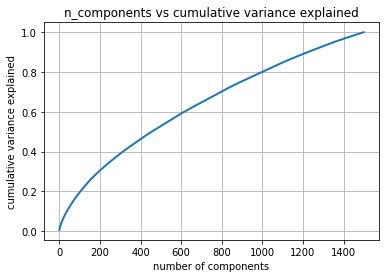

In [186]:
plt.plot(cum_var_explained,linewidth=2)
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')
plt.title('n_components vs cumulative variance explained')
plt.grid()

n_components=1400 is enough to preserve 100% variance , hence applying TruncatedSVD with n=1400 

In [187]:
svd=TruncatedSVD(n_components=1400)
svd.fit(mat)
x_train_svd=svd.transform(mat)

In [188]:
word_dict={tfidf_word_mapping.iloc[0][0]:x_train_svd[0]}
for i in range(x_train_svd.shape[0]):
    word_dict.update({tfidf_word_mapping.iloc[i][0]:x_train_svd[0]}) 

### Vectorizing concatenated essay and title with the obtained matrix:

In [189]:
def custom_vectorizer(input):
    init=np.zeros((1,1400))
    vectorized_output=[]
    vectorized_output.append(init)
    for sent in input:
        for word in sent.split():
            temp=0
            if(word in word_dict):
                #print(word)
                temp=temp+word_dict.get(word)
        vectorized_output.append(temp)   
    return  vectorized_output
            

In [190]:
x_train_encoded=np.asarray(custom_vectorizer(preprocessed_essays_x_train)).reshape(-1,1)
x_cv_encoded=np.asarray(custom_vectorizer(preprocessed_essays_x_cv)).reshape(-1,1)
x_test_encoded=np.asarray(custom_vectorizer(preprocessed_essays_x_test)).reshape(-1,1)

### 1.5.3 Vectorizing Numerical features

In [73]:
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'essay_title_concatenated', 'clean_categories', 'clean_subcategories',
       'clean_grade'],
      dtype='object')

In [191]:
# Normalizing price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(x_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
count=1
feature_names.append('Price Normalized')
print('Length of feature name list:',len(feature_names))
print('Features added:',count)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
Length of feature name list: 101
Features added: 1


In [192]:
# Normalizing teacher_number_of_previously_posted_projects
normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
count=1
feature_names.append('teacher_number_of_previously_posted_projects normalized')
print('Length of feature name list:',len(feature_names))
print('Features added:',count)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
Length of feature name list: 102
Features added: 1


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [193]:
# Concatenating Train Data
from scipy.sparse import hstack
categorical_data=hstack((x_train_category_ohe,x_train_Subcategory_ohe,X_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe)).tocsr()
text_data=x_train_encoded
numerical_data=np.hstack((X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm))
x_train_concatenated=hstack((categorical_data,numerical_data))
print('Categorical Data Shape : ',categorical_data.shape)
print('Text Data Shape :',text_data.shape)
print('Numerical Data :',numerical_data.shape)
print('Final Train Data Shape :',x_train_concatenated.shape)

# Concatenating CV Data
from scipy.sparse import hstack
categorical_data=hstack((x_cv_category_ohe,x_cv_Subcategory_ohe,X_cv_state_ohe,x_cv_teacher_ohe,x_cv_grade_ohe)).tocsr()
text_data=x_cv_encoded
numerical_data=np.hstack((X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm))
x_cv_concatenated=hstack((categorical_data,numerical_data))
print('Categorical Data Shape : ',categorical_data.shape)
print('Text Data Shape :',text_data.shape)
print('Numerical Data :',numerical_data.shape)
print('Final cv Data Shape :',x_cv_concatenated.shape)

# Concatenating test Data
from scipy.sparse import hstack
categorical_data=hstack((x_test_category_ohe,x_test_Subcategory_ohe,X_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe)).tocsr()
text_data=x_test_encoded
numerical_data=np.hstack((X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm))
x_test_concatenated=hstack((categorical_data,numerical_data))
print('Categorical Data Shape : ',categorical_data.shape)
print('Text Data Shape :',text_data.shape)
print('Numerical Data :',numerical_data.shape)
print('Final test Data Shape :',x_test_concatenated.shape)




Categorical Data Shape :  (49041, 100)
Text Data Shape : (49043, 1)
Numerical Data : (49041, 2)
Final Train Data Shape : (49041, 102)
Categorical Data Shape :  (24155, 100)
Text Data Shape : (24156, 1)
Numerical Data : (24155, 2)
Final cv Data Shape : (24155, 102)
Categorical Data Shape :  (36052, 100)
Text Data Shape : (36053, 1)
Numerical Data : (36052, 2)
Final test Data Shape : (36052, 102)


# Hyper parameter tuning

In [185]:
import xgboost as xgb
from sklearn.model_selection import KFold,cross_val_score
n_est=[50,200,500,1000,2000]
for n in n_est:
    xgb_=xgb.XGBClassifier(learning_rate=0.05,n_estimators=n)
    xgb_.fit(x_train_concatenated,y_train)
    kf=KFold(n_splits=5,shuffle=True).get_n_splits(x_cv_concatenated)
    score=cross_val_score(xgb_,x_cv_concatenated,y_cv,scoring='roc_auc',cv=kf,n_jobs=-1)
    print('ROC_AUC : {} ,STDEV:{} for n_estimators:{}'.format(score.mean(),score.std(),n))

ROC_AUC : 0.5573942501182934 ,STDEV:0.011456040492393323 for n_estimators:50
ROC_AUC : 0.5641328188605076 ,STDEV:0.009314332885526962 for n_estimators:200
ROC_AUC : 0.558777003716296 ,STDEV:0.007067499590093207 for n_estimators:500
ROC_AUC : 0.5548102198770726 ,STDEV:0.00595938147539873 for n_estimators:1000
ROC_AUC : 0.5509813521419689 ,STDEV:0.0074218011590933865 for n_estimators:2000


In [188]:
max_depth=[2,4,6,8,10,12]
for d in max_depth:
    xgb_=xgb.XGBClassifier(learning_rate=0.05,n_estimators=200,max_depth=d)
    xgb_.fit(x_train_concatenated,y_train)
    kf=KFold(n_splits=5,shuffle=True).get_n_splits(x_cv_concatenated)
    score=cross_val_score(xgb_,x_cv_concatenated,y_cv,scoring='roc_auc',cv=kf,n_jobs=-1)
    print('ROC_AUC : {} ,STDEV:{} for n_estimators=200,max_depth:{}'.format(score.mean(),score.std(),d))

ROC_AUC : 0.5649448007523414 ,STDEV:0.012278501804800513 for n_estimators=200,max_depth:2
ROC_AUC : 0.5633846869445049 ,STDEV:0.00952077158349767 for n_estimators=200,max_depth:4
ROC_AUC : 0.558256871505848 ,STDEV:0.0070979320021683475 for n_estimators=200,max_depth:6
ROC_AUC : 0.5552802081600372 ,STDEV:0.008295782213925745 for n_estimators=200,max_depth:8
ROC_AUC : 0.5486447093893226 ,STDEV:0.0076605394518777245 for n_estimators=200,max_depth:10
ROC_AUC : 0.5469889126620483 ,STDEV:0.007686094874902488 for n_estimators=200,max_depth:12


**XGBoostClassifier with obtained optimal Hyperparameter:**

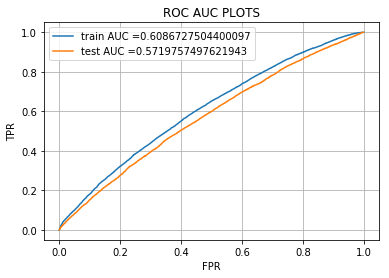

In [195]:
# defining model with optimal hyperparameters and calculating tpr,fpr

clf=xgb.XGBClassifier(n_estimators=200,min_samples_split=10,max_depth=3)
clf.fit(x_train_concatenated,y_train)
y_train_pred=clf.predict_proba(x_train_concatenated)[:,1]
y_test_pred=clf.predict_proba(x_test_concatenated)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# Plotting AUC Score for train and test data
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC PLOTS")
plt.grid()
plt.show()

In [196]:
# We are taking 70% confidence score to predect class label 1
y_predicted_train=[1 if (y_train_pred[i]>0.7) else 0 for i in range(len(y_train_pred)) ]
y_predicted_test=[1 if (y_test_pred[i]>0.7) else 0 for i in range(len(y_test_pred)) ]

confusion matrix Train Data
AxesSubplot(0.125,0.125;0.62x0.755)


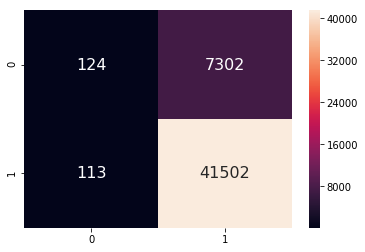

In [197]:
# Train confusion matrix
df1=pd.DataFrame(confusion_matrix(y_train,y_predicted_train))
df2=pd.DataFrame(confusion_matrix(y_test,y_predicted_test))
print("confusion matrix Train Data")
print(sns.heatmap(df1, annot=True,annot_kws={"size": 16}, fmt='g'))

confusion matrix Test Data
AxesSubplot(0.125,0.125;0.62x0.755)


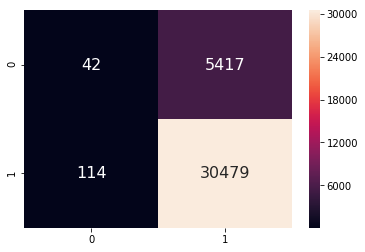

In [198]:
# Test confusion matrix
print("confusion matrix Test Data")
print(sns.heatmap(df2, annot=True,annot_kws={"size": 16}, fmt='g'))

## Conclusion(s):

**Step(s):**

1. The Dataset has been divided in to Train Dataset(70%) and Test DataSet(30%). The Train Dataset is further divided into Train and CV dataset.
2. The Data has been preprocessed through following ways :
   a) Four essays has been merged in to one column 'Essay'.
   b) 'Essay' and 'Project title' has been decontracted ,stop words ,digits and special characters are removed ,stemming is done       through snowball stemmer.
   c)'Grade' column has been modified by removing unnecessary spaces and 'Grade' word .ex 'Grade PreK to 5; has been modified to 
      'PrekTo5'
   d)'Essay' and 'Project Title' has been merged as a single column 'Concatenated essay and  title'  
3. Categorical Data has been converted to 'One Hot Encoding' format.
4. Numeriacal Data has been normalized.
5. 2000 words has been selected from the concatenated essay and title text data with non incresing order of idf value.
6. 2000*2000 dimensional co-occurance matrix has been genereted out of these words with window size=5,TruncatedSVD has been applied on top it to reduce dimension .
7. Text data has been vectorized with help of the truncated matrix ,all the words not in the 2000 words have been ignored.       
7. The optimal hyperparameters for XGBoost Classifier with the given data is estimated With the help of 5  fold Cross Validation.
8. XGBoost classifier has been used with the obtained optimal n_estimators and n_depth to predict test data.
   

# Conclusion(s):

**Observation(s):**

1. A XGB Classifier with max depth 10 and n_estimators=200 tends to be ideal for this problem statement.
2. Using only 2000 words from a large corpus has significant impact on the performance of the model.
3. The obtained train roc_auc(0.60) is inline with the obtained test roc_auc(0.57) hence the model in well fitted.